# Replicating "Bayesian Analysis with Python" using Julia

by Dongjae Lee

Copyright Notice:
All rights and ownership of this code belong to the original textbook author, and this replication in Julia is solely intended for educational purposes.

In [ ]:
using Turing
using LinearAlgebra: I
using Statistics: mean, std
using CSV
using DataFrames
using Distributions
using Random: seed!
seed!(123)

Random.TaskLocalRNG()

In [322]:
μ = 0.
σ = 1.
X = Normal(μ, σ)
x = rand(X,3)
x

3-element Vector{Float64}:
 -0.713400597209981
  2.5436473959148627
 -1.370788088366329

In [344]:
using Printf
using Plots, LaTeXStrings

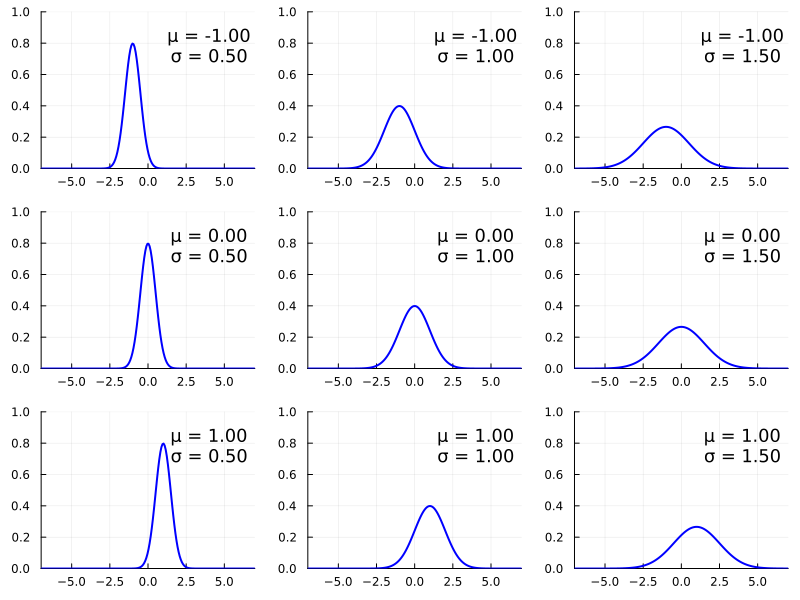

In [ ]:
μ = [-1 0 1];
σ = [0.5 1 1.5];
x = range(-7,7,200);

p = plot(layout=(3,3),size=(800,600),legend=false,xlims=(-7, 7),ylims=(0, 1))

for i=1:3, j=1:3
    plot!(p[(i-1)*3+j],x,pdf.(Normal(μ[i],σ[j]),x),color=:blue,background=:white,lw=2)
    annotate!(p[(i-1)*3+j],4,0.85,text("μ = "*string(Printf.format.(Ref(Printf.Format("%.2f")),μ[i])),12))
    annotate!(p[(i-1)*3+j],4,0.72,text("σ = "*string(Printf.format.(Ref(Printf.Format("%.2f")),σ[j])),12))
end
p

In [343]:
data = CSV.read("data/mauna_loa_CO2.csv", DataFrame,header=false);
first(data,4)

Row,Column1,Column2
,Float64,Float64
1,1959.0,315.42
2,1959.08,316.31
3,1959.17,316.5
4,1959.25,317.56


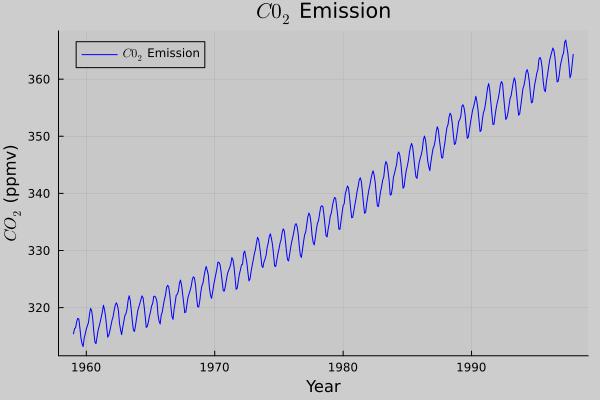

In [345]:
plot(data[:,1],data[:,2],label=L"$C0_{2}$ Emission",lc=:blue)
xlabel!("Year")
title!(L"$C0_{2}$ Emission")
ylabel!(L"$CO_{2}$ (ppmv)")

In [7]:
n_params = [1, 2, 4]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success
pmf=zeros(maximum(n_params)+2,1)
pmfstacked=zeros(maximum(n_params)+2,length(n_params)*length(p_params))
for i=1:length(n_params)
    for j = 1:length(p_params)
        D = Binomial(n_params[i],p_params[j])
            for k=0:maximum(n_params)+1
                pmf[k+1]= pdf(D,k)
            end
        pmfstacked[:,i*length(p_params)+j-length(p_params)] =  pmf
    end
end

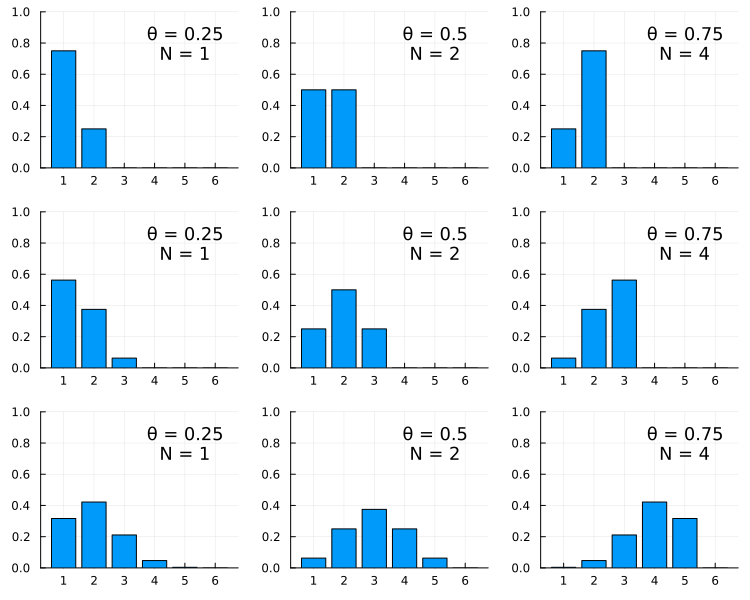

In [201]:
bb = bar(pmfstacked,layout=(3,3),legend=false,ylim=(0,1),size=(250*3,200*3))
for i=1:3, j=1:3
    annotate!(bb[i*3-3+j],5,0.86,text("θ = "*string(p_params[j]),12))
    annotate!(bb[i*3-3+j],5,0.734,text("N = "*string(n_params[j]),12))
end
bb

In [ ]:
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150];
θ_real = 0.35;
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48];

# Generate Random numbers to create a (pseudo-) dataset
beta_params = [(0.5,0.5), (1,1), (20,20)];
x = range(0,1,200);

0.0:0.005025125628140704:1.0

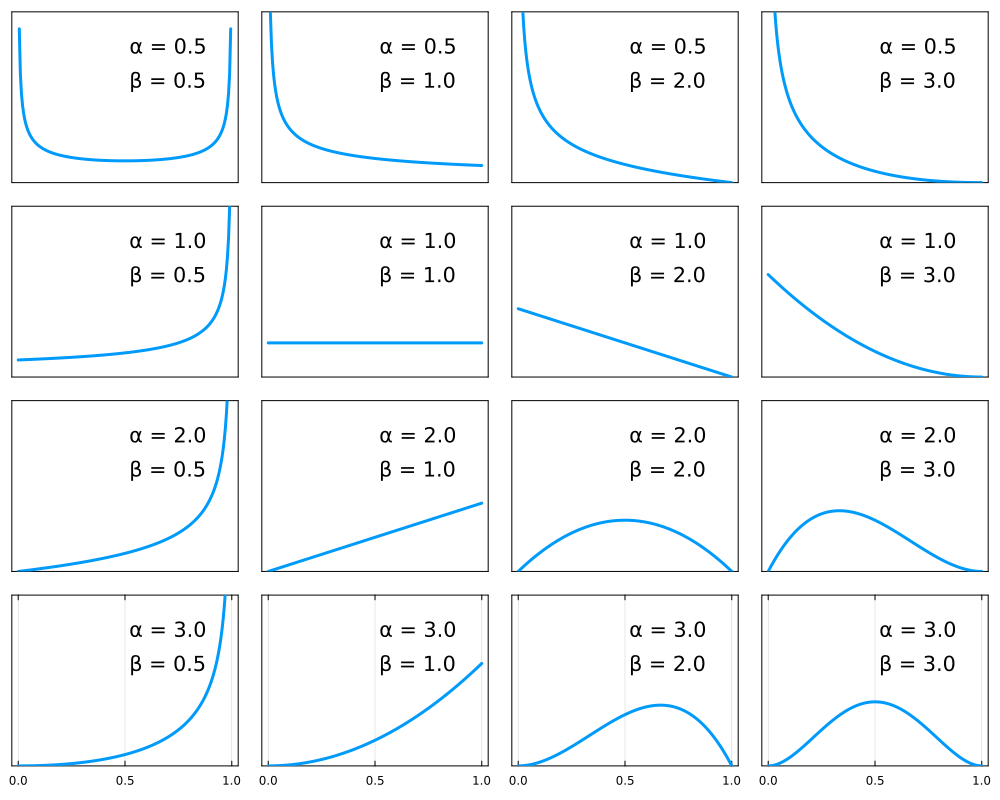

In [218]:
params = [0.5, 1, 2, 3]
p=plot(layout=(4,4),legend=false,yticks=false,xticks=false,framestyle=:box,ylim=(0, 5),size=(250*4,200*4))
for i =1:4, j=1:4
    plot!(p[i*4-4+j],x,pdf.(Beta(params[i],params[j]),x),lw=3,color=[1 0 0])
    annotate!(p[i*4-4+j],0.7,4,"α = "*string(params[i]))
    annotate!(p[i*4-4+j],0.7,3,"β = "*string(params[j]))
    if i==4
        plot!(p[i*4-4+j],xticks=[0, 0.5, 1 ])
    end
end
p

In [ ]:
xxx = Array{Union{Distribution, Nothing}}(undef, 10, 3)
for zx=1:length(beta_params)
      xxx[1,zx] =   Beta(beta_params[zx][1], beta_params[zx][2])
end

for i = 2:10, zx=1:length(beta_params)
     xxx[i,zx] =   Beta(beta_params[zx][1]+data[i], beta_params[zx][2]+n_trials[i]-data[i])
 #    xxx[i,zx] =   binom_posterior(n_trials[i],data[i],beta_params[zx][1], beta_params[zx][2])
end


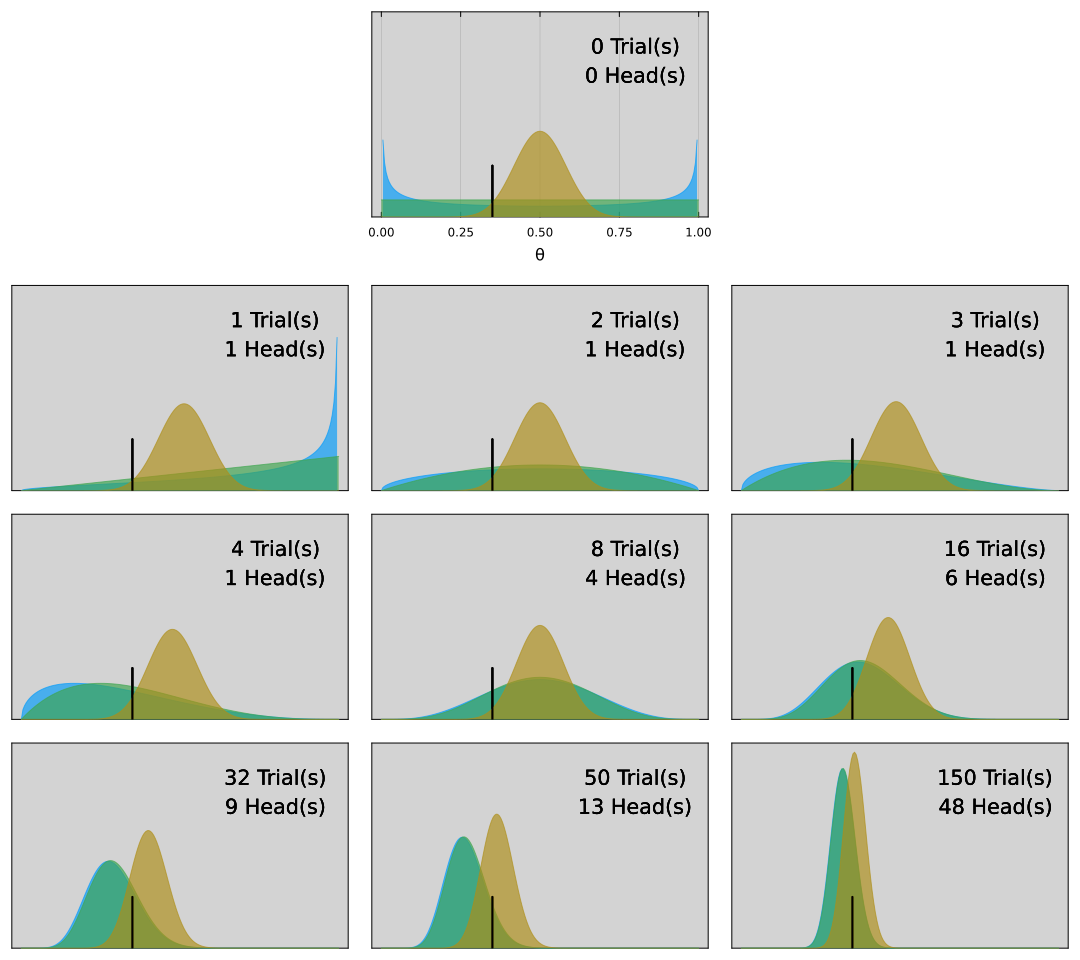

In [ ]:
l = @layout [ _ a _ ;b c d; e f g; h i j]
p=plot(layout=l,legend=false,size=(1080,960),ylim=(0, 12))
for i=1:10, zx=1:3
if i==1
  plot!(p[i],x, pdf.(xxx[i,zx],x), fillrange=0,alpha=0.66,framestyle=:box,yticks=false)
else
  plot!(p[i],x, pdf.(xxx[i,zx],x), fillrange=0,alpha=0.66, yticks=false, xticks=false,framestyle=:box)
end
  annotate!(p[i],0.8,10,string(n_trials[i])*" Trial(s)")
  annotate!(p[i],0.8,8.3,string(data[i])*" Head(s)")
  plot!(p[i],[θ_real; θ_real],[0, 3], line=:solid, color=:black, lw=2,background_color=:lightgray,background_color_outside=:white)
end
xlabel!(p[1],"θ")
p

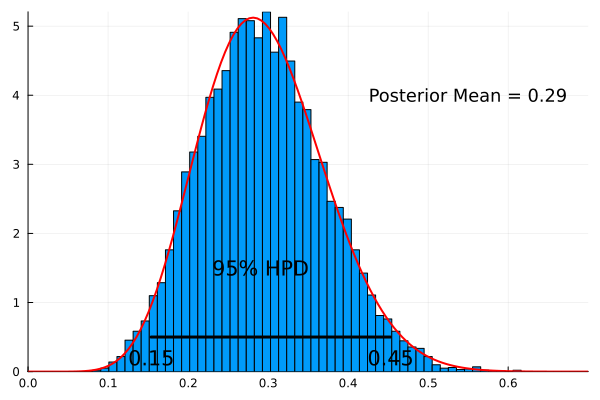

In [311]:
θ_post =  rand(xxx[8,2],10000)
p = histogram(θ_post,legend=false,bins=range(0,1,100),normalize=:pdf,background=:white)
plot!(p,x,pdf.(xxx[8,2],x),color=:red,lw=2,xlim=(0,0.7))
annotate!(0.55,4,text("Posterior Mean = "*string(round(mean(θ_post)*100)/100),12))
plot!([quantile(θ_post,0.025), quantile(θ_post,1-0.025)],[0.5,0.5],lw=3,color=:black)
annotate!(median(θ_post),1.5,"95% HPD")
annotate!(quantile(θ_post,0.025),0.2,Printf.format.(Ref(Printf.Format("%.2f")), quantile(θ_post,0.025)))
annotate!(quantile(θ_post,1-0.025),0.2,Printf.format.(Ref(Printf.Format("%.2f")), quantile(θ_post,1-0.025)))

"0.46"